#**Q LEARNING ON PYTHON GYM**

Gym offers many in-built RL environments which you can use to play around with. These environments are Python classes with their state spaces, action spaces and rewards pre-defined. Here we will use the Taxi-v3 environment and apply basic Q-Learning on it and train the agent.

You can find the taxi-v3 documentation here:
https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py


In [ ]:
import gym

game_env=gym.make('Taxi-v3')
state_size=game_env.observation_space.n
action_size=game_env.action_space.n
print(state_size)
print('\n',action_size)
game_env.render()


500

 6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Episode: 0 avg:-279.0 min:-279 max:-279
Episode: 2500 avg:-22.0572 min:-486 max:15
Episode: 5000 avg:7.7572 min:3 max:15
Episode: 7500 avg:7.9204 min:3 max:15
Episode: 10000 avg:7.9376 min:3 max:15
Episode: 12500 avg:7.8508 min:3 max:15
Episode: 15000 avg:7.878 min:3 max:15
Episode: 17500 avg:7.864 min:3 max:15
Episode: 20000 avg:7.7756 min:3 max:15
Episode: 22500 avg:7.8808 min:3 max:15
Training completed over 25000 episodes
Press Enter to watch trained agent...
TRAINED AGENT
Step 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
score: -1
TRAINED AGENT
Step 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
score: -2
TRAINED AGENT
Step 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
score: -3
TRAINED AGENT
Step 4
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
score: -4
TRAINED AGENT
Step 5
+---------+


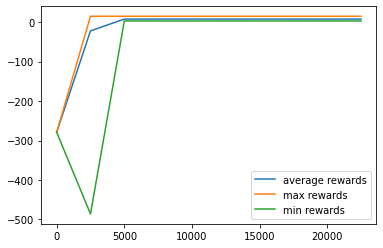

In [ ]:
#Q-learning on taxi-v3

import numpy as np
import gym
import random
import matplotlib.pyplot as plt


def main():
    game_env = gym.make('Taxi-v3')

    state_size = game_env.observation_space.n
    action_size = game_env.action_space.n
    qtable = np.zeros((state_size, action_size))

    ep_rewards = []
    aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

    learning_rate = 0.6
    discount_rate = 0.9
    epsilon = 0.4
    decay_rate= 0.005

    num_episodes = 25000
    SHOW_EVERY=2500
    max_steps = 99 

    for episode in range(num_episodes):
      episode_reward=0

      state = game_env.reset()
      done = False

      for s in range(max_steps):

            #the exploration-exploitation tradeoff
          if random.uniform(0,1) < epsilon:
              action = game_env.action_space.sample()
          else:
              action = np.argmax(qtable[state,:])


          new_state, reward, done, info = game_env.step(action)
          episode_reward += reward


          qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

          state = new_state

          if done == True:
              break
      epsilon = np.exp(-decay_rate*episode)
      ep_rewards.append(episode_reward)
      if not episode % SHOW_EVERY:
          average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
          aggr_ep_rewards['ep'].append(episode)
          aggr_ep_rewards['avg'].append(average_reward)
          aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
          aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
          print(f"Episode: {episode} avg:{average_reward} min:{min(ep_rewards[-SHOW_EVERY:])} max:{max(ep_rewards[-SHOW_EVERY:])}")
    
       

    print(f"Training completed over {num_episodes} episodes")
    input("Press Enter to watch trained agent...")

    # watching trained agent
    state = game_env.reset()
    done = False
    rewards = 0

    for s in range(max_steps):

        print(f"TRAINED AGENT")
        print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = game_env.step(action)
        rewards += reward
        game_env.render()
        print(f"score: {rewards}")
        state = new_state

        if done == True:
            break

    game_env.close()
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
    plt.legend(loc=4)
    plt.show()

if __name__ == "__main__":
    main()